### Prepare Dataset

In [ ]:
!unzip data.zip -d data

### Setting YOLO

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

### Training

In [ ]:
import torch
torch.cuda.is_available()

In [18]:
import os
# os.chdir("../")
os.getcwd()

'C:\\Users\\user\\Desktop\\pnh\\yolov5'

In [ ]:
import os
# os.chdir("yolov5")
os.environ['KMP_DUPLICATE_LIB_OK']='True'
!python train.py --data "../data/aug/data.yaml" --cfg yolov5s.yaml --weights '' --img 64 --batch-size 64 --epochs 100

### Prediction

In [3]:
import os
os.chdir("C:/Users/user/Desktop/pnh/yolov5")
os.getcwd()

'C:\\Users\\user\\Desktop\\pnh\\yolov5'

detect: weights=['runs/train/exp8/weights/best.pt'], source=../data/test5_240_Y.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.01, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=True, line_thickness=1, hide_labels=True, hide_conf=True, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-90-ga895e98 Python-3.9.16 torch-1.13.1 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 C:\Users\user\Desktop\pnh\data\test5_240_Y.jpg: 512x640 1000 particles, 15.6ms
Speed: 0.0ms pre-process, 15.6ms inference, 15.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs\detect\exp


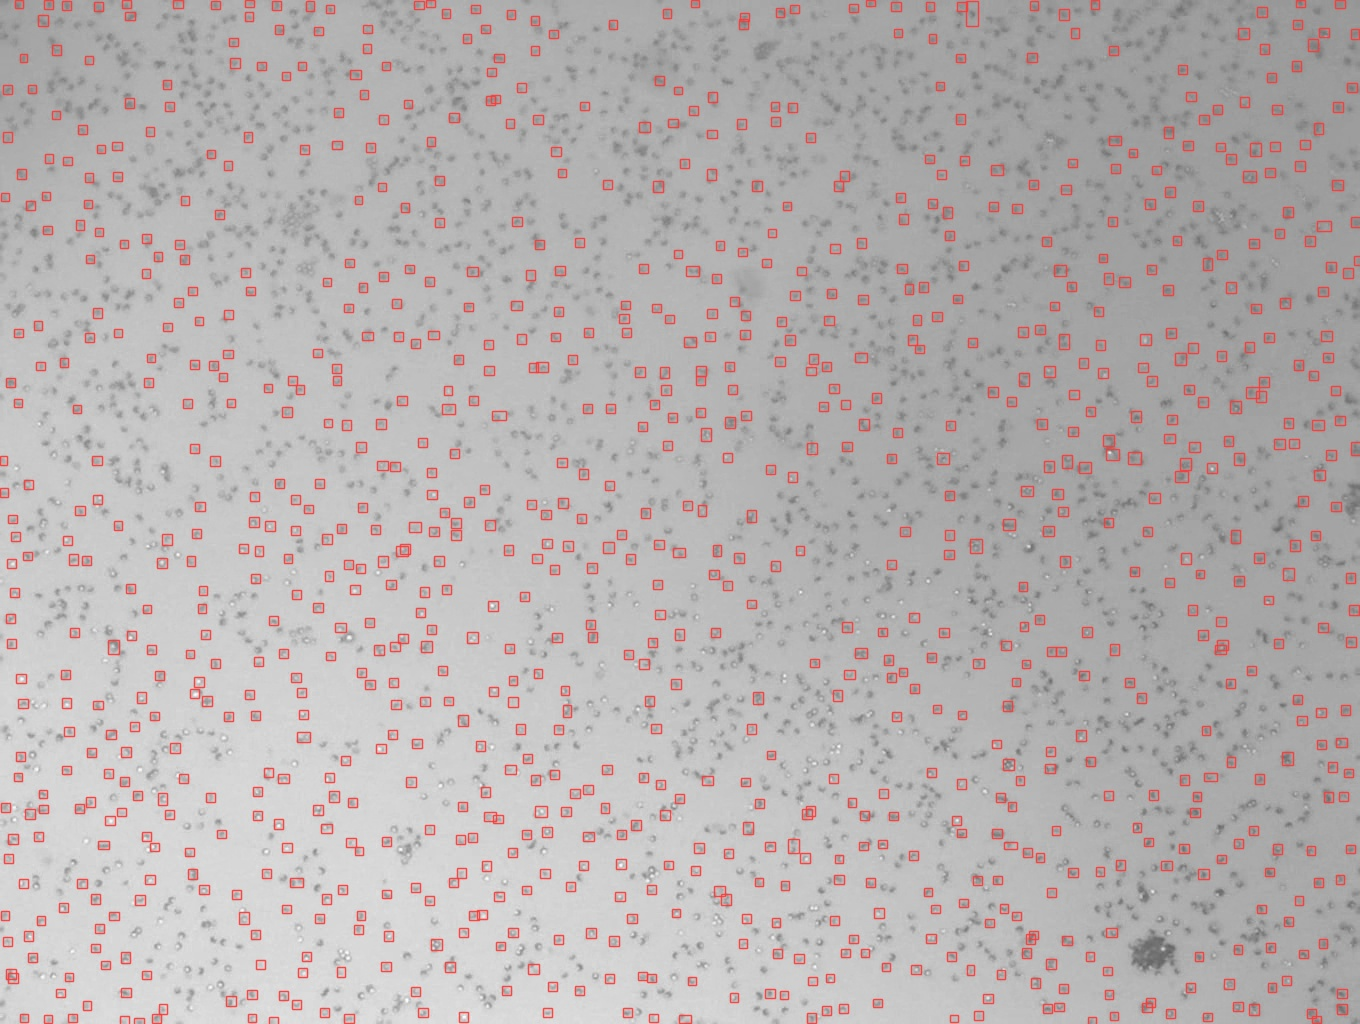

In [24]:
from IPython.display import Image

test_img_path = "../data/test5_240_Y.jpg"
!python detect.py --weights runs/train/exp8/weights/best.pt --conf 0.01 --exist-ok --source "{test_img_path}" --line-thickness 1 --hide-labels --hide-conf

Image(os.path.join('runs/detect/exp', os.path.basename(test_img_path)))


In [7]:
!zip -r ../runs.zip /runs

'zip'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.


In [8]:
import torch

model = torch.hub.load(".", 'custom', path="runs/train/exp3/weights/best.pt", source='local')
result = model("../data/test5_240_Y.jpg")

rst_box = result.pandas().xywh[0].iloc[:, 0:4]
rst_box.insert(0, "class", 0)
rst_box[['xcenter', 'width']] = rst_box[['xcenter', 'width']] / 1360
rst_box[['ycenter', 'height']] = rst_box[['ycenter', 'height']] / 1024
rst_box.to_csv("../data/test_240.txt", sep=' ', index=False, header=False)

YOLOv5  v7.0-90-ga895e98 Python-3.9.16 torch-1.13.1 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
